# Metric Volatility Estimation

[![open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ing-bank/probatus/blob/master/docs/tutorials/nb_metric_volatility.ipynb)

The estimation of AUC of your model could be influenced by, for instance, how you split your data. If another random seed was used, your AUC could be 3% lower. In order to understand how stable your model evaluation is, and what performance you can expect on average from your model, you can use the `metric_volatility` module.

### Setup

In [ ]:
%%capture
!pip install probatus

In [14]:
from probatus.metric_volatility import TrainTestVolatility, SplitSeedVolatility, BootstrappedVolatility
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(n_samples=1000, n_features=10, random_state=1)
clf = RandomForestClassifier(n_estimators = 2, max_depth=2, random_state=0)

### TrainTestVolatility
The class that provides a wide functionality for experimentation with metric volatility is TrainTestVolatility. Please refer to the API reference for full description of available parameters.

By default, the class performs a simple experiment, in which it computes the metrics on data split into train and test set with a different random seed at each iteration. Having computed the mean and standard deviation of the metrics, you can analyse the impact of random seed setting on your results and get a better estimation of performance on this dataset.

When you run the `fit()` and `compute()` or `fit_compute()`, the experiment described above is performed and the report is returned. The `train_mean` and and `test_mean` show an averaged performance of the model, and `delta_mean` indicates on average how much the model overfits on the data. 

By looking at `train_std`, `test_std`, `delta_std`, you can assess the stability of these scores overall. High volatility on some of the splits may indicate the need to change the sizes of these splits or make changes to the model.

In [15]:
# Basic functionality 
volatility = TrainTestVolatility(clf, iterations=50)
volatility.fit_compute(X, y)

,train_mean,train_std,test_mean,test_std,delta_mean,delta_std
roc_auc,0.831818,0.036407,0.816538,0.043732,0.01528,0.027516


The results above show quite unstable results, due to high `train_std` and `test_std`. However, the `delta_mean` is relatively, which indicates that the model might underfit and increasing the complexity of the model could bring improvements to the results.

One can also present the distributions of train, test and deltas for each metric. The plots allows for a sensitivity analysis.

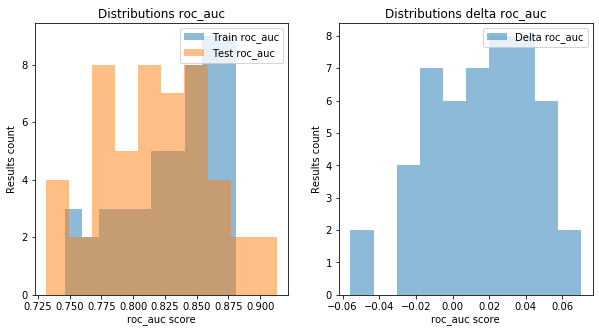

In [16]:
axs = volatility.plot()

In order to simplify the use of this class for the user, two convenience classes have been created to perform the main types of analyses with less parameters needed to be set by the user.

### SplitSeedVolatility 

The estimation of volatility is done in the same way as the default analysis described in TrainTestVolatility. The main advantage of using that class is a lower number of parameters to set.

In [17]:
volatility = SplitSeedVolatility(clf, iterations=50 , test_prc = 0.5)
volatility.fit_compute(X, y)

,train_mean,train_std,test_mean,test_std,delta_mean,delta_std
roc_auc,0.827796,0.039356,0.804926,0.040501,0.02287,0.019264


### BootstrappedVolatility

This class allows to perform a different experiment. At each iteration, the train-test split is the same, however, the samples in both splits are bootstrapped (sampled with replacement). Thus, some of the samples might be omitted, and some will be used multiple times in a given run. 

With this experiment, you can estimate an average performance for a specific train-test split, as well as indicate how volatile the scores are towards certain samples within your splits. Moreover, you can experiment with the amount of data sampled in each split, to tweak the test split size.

In [18]:
volatility = BootstrappedVolatility(clf, iterations=50, scoring=['accuracy', 'roc_auc'])
volatility.fit_compute(X, y)

,train_mean,train_std,test_mean,test_std,delta_mean,delta_std
accuracy,0.823200,0.031567,0.765120,0.049303,0.058080,0.034091
roc_auc,0.852316,0.029762,0.785378,0.053647,0.066938,0.038386
